In [2]:
import xgboost
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap

data = pd.read_csv('F:/Desktop/美赛_2024/train.csv')
# cols = ['server','winner','unf_err','net_pt_won',	
#        'rec_score','overall_pt_diff','game_key_pt',
#        'set_key_pt','break_pt_won','ace','double_fault',
#        'serve_succ','point_victor']
# 
cols = ['server','winner','unf_err','net_pt_won',	
       'rec_score','overall_pt_diff','game_key_pt',
       'set_key_pt','break_pt_won','ace','double_fault',
        'serve_succ','point_victor']
X = data[cols]
y = data['y']
label_mapping = {0: 'Swing', 1: 'Keep'}
# train XGBoost model
# X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)


[19:46:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
100%|===================| 7278/7284 [00:39<00:00]        

In [12]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

[20:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 98%|===================| 7136/7284 [00:37<00:00]        

In [15]:
print(shap_values)

.values =
array([[ 0.23098661,  0.04318997, -0.21694015, ...,  0.0010453 ,
         0.09283729,  0.14039316],
       [-0.11083261,  0.08272989, -0.09287962, ...,  0.00806247,
        -0.00737299, -0.18992291],
       [ 0.01248582,  0.01243887, -0.41368729, ...,  0.01703859,
        -0.17299605,  0.39324169],
       ...,
       [ 0.2428146 ,  0.26258375,  0.09036036, ...,  0.01368585,
        -0.11431949, -0.04595247],
       [ 0.38372396,  0.0637776 ,  0.05428756, ...,  0.01085439,
        -0.0117448 ,  0.04106577],
       [ 0.29092021, -0.1131725 ,  0.01350388, ...,  0.0144534 ,
        -0.02040967,  0.01618904]])

.base_values =
array([-1.14300402, -1.14300402, -1.14300402, ..., -1.14300402,
       -1.14300402, -1.14300402])

.data =
array([[1., 0., 1., ..., 0., 1., 2.],
       [1., 0., 1., ..., 0., 2., 1.],
       [1., 0., 2., ..., 0., 3., 2.],
       ...,
       [1., 2., 0., ..., 0., 3., 2.],
       [1., 1., 0., ..., 0., 3., 1.],
       [1., 0., 0., ..., 0., 3., 1.]])


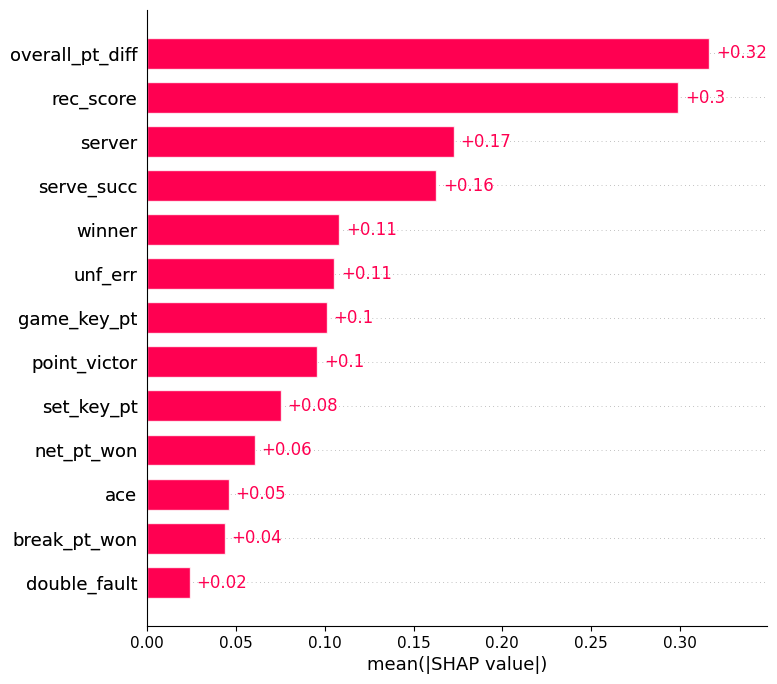

In [5]:
shap.plots.bar(shap_values, max_display=13)

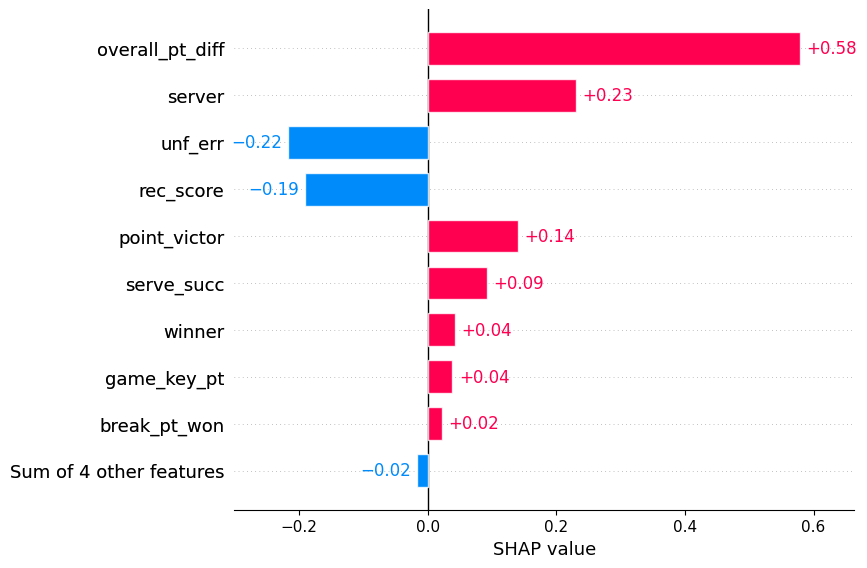

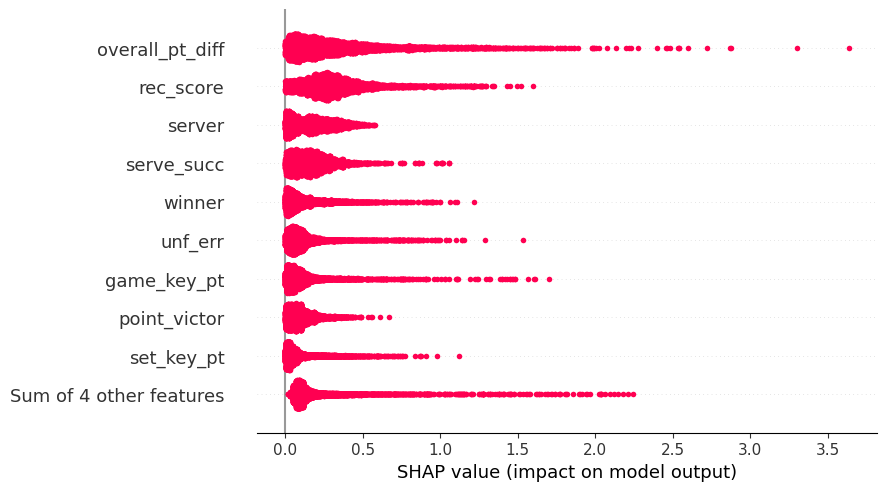

In [6]:
shap.plots.bar(shap_values[0])
shap.plots.beeswarm(shap_values.abs, color="shap_red")

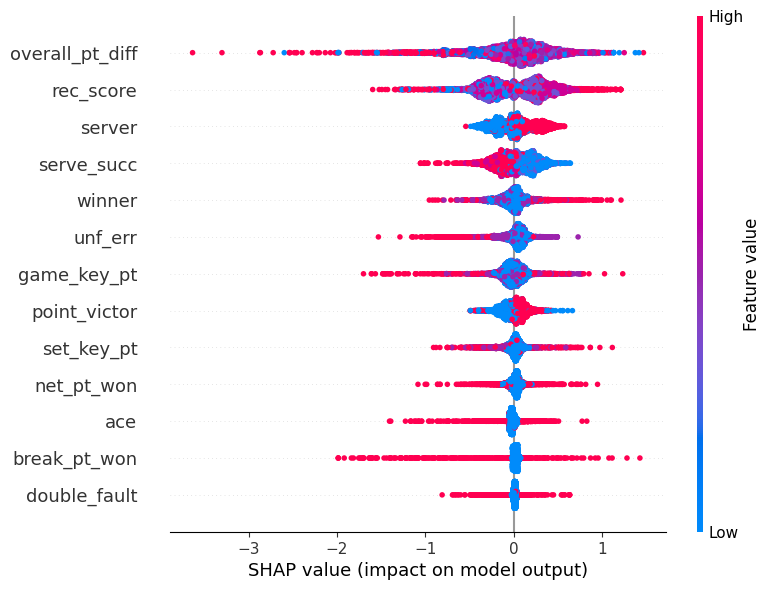

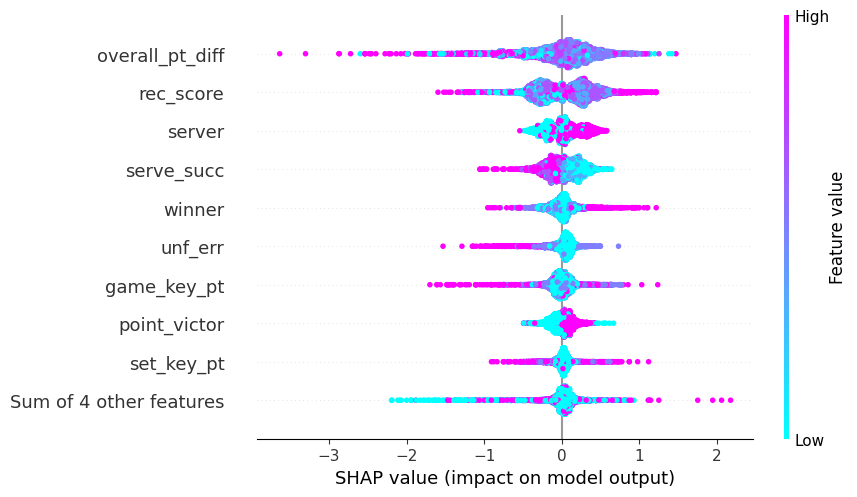

In [7]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, max_display=13)
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

In [8]:
shap.plots.heatmap(shap_values)

MemoryError: Unable to allocate 405. MiB for an array with shape (7284, 7284) and data type float64

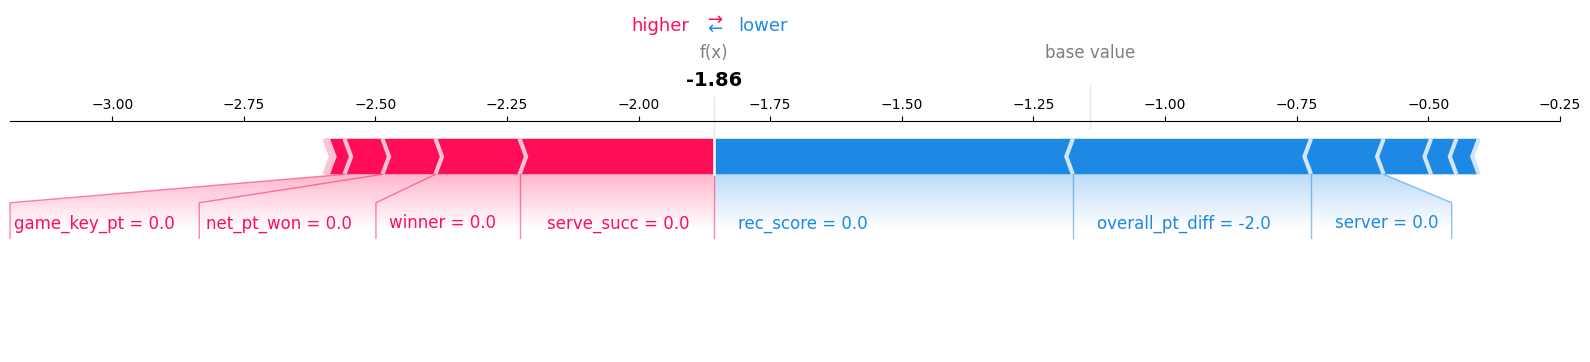

In [9]:
# 如果不想用JS,传入matplotlib=True
shap.plots.force(shap_values[7217],matplotlib=True)

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
The figure layout has changed to tight
Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
The figure layout has changed to tight


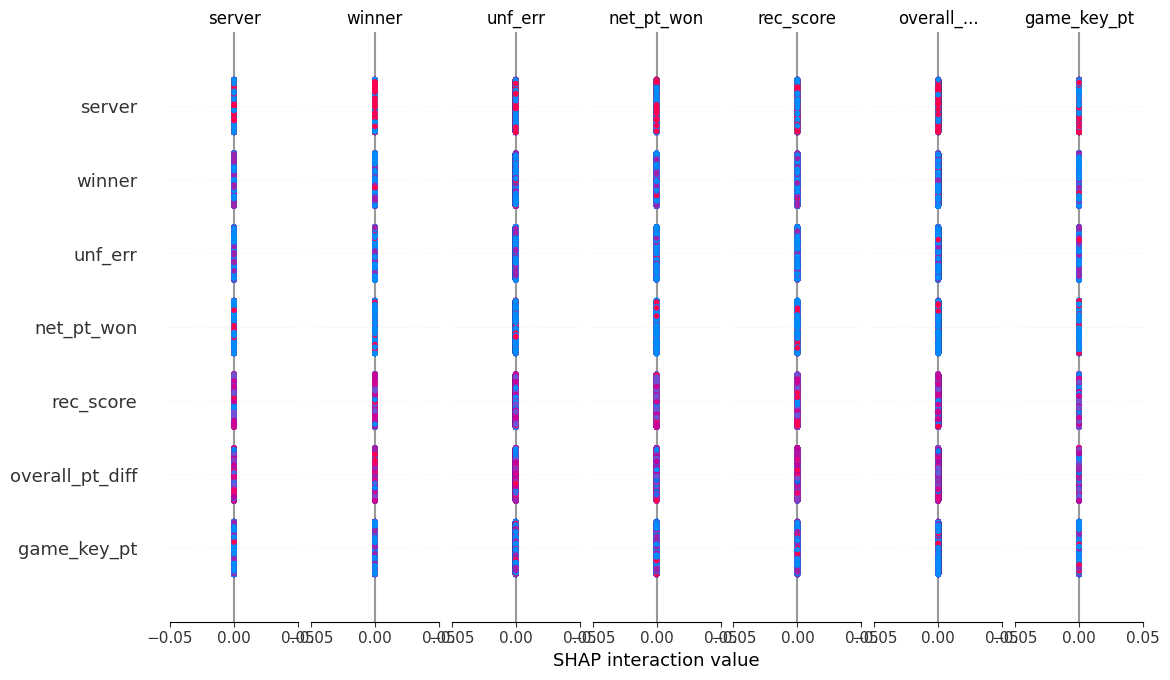

In [10]:
# 特征交互解释
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

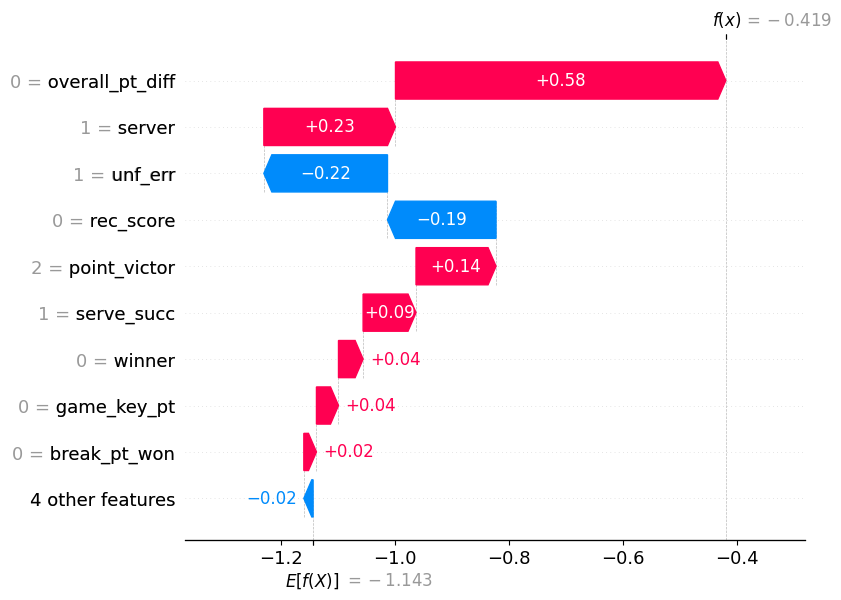

In [11]:
shap.plots.waterfall(shap_values[0])

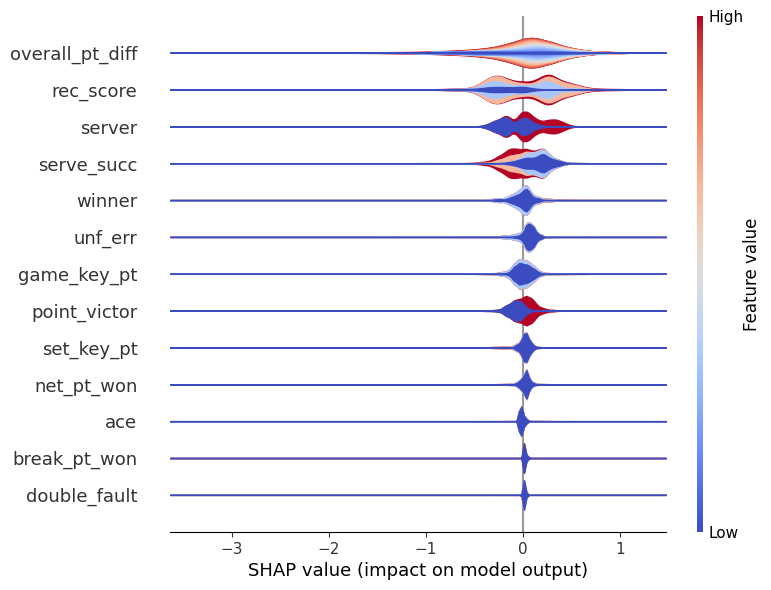

In [12]:
shap.plots.violin(
    shap_values, features=X, feature_names=cols, plot_type="layered_violin"
)

In [19]:
# explainer = shap.Explainer(model, X)
# shap_values = explainer(X)
for i in range(8):
    shap.dependence_plot(cols[i], shap_values, X)

KeyError: 1

In [ ]:
plt.figure(figsize=(7.5, 5))

plt.scatter(X[0], shap_values[:, 0], s=10, alpha=1)